## Trabalho T4 - Integração Numérica

### MTM224 - Mét. Numéricos Computacionais

**Curso:**

**Turma:**

**Nome(s):**

### Questão 1
Use os programas desenvolvidos nas aulas para integrar numericamente a função $$\int_0^3{x^2e^x}dx$$ usando a regra dos trapézios, a regra de 1/3 de Simpson e a regra de 3/8 de Simpson com 12 subintervalos. Compare dos resultados obtidos com a solução exata.


In [1]:
import numpy as np

def f(x):
    return x**2 * np.exp(x)

def solucao_exata():
    return np.exp(3) * (9 - 6 + 2) - 2

def regra_dos_trapezios(func, a, b, n):
    h = (b - a) / n
    resultado = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        resultado += func(a + i * h)
    resultado *= h
    return resultado

def regra_um_terco_simpson(func, a, b, n):
    h = (b - a) / n
    resultado = func(a) + func(b)
    for i in range(1, n):
        if i % 2 == 0:
            resultado += 2 * func(a + i * h)
        else:
            resultado += 4 * func(a + i * h)
    resultado *= h / 3
    return resultado

def regra_tres_oitavos_simpson(func, a, b, n):
    h = (b - a) / n
    resultado = func(a) + func(b)
    for i in range(1, n):
        if i % 3 == 0:
            resultado += 2 * func(a + i * h)
        else:
            resultado += 3 * func(a + i * h)
    resultado *= 3 * h / 8
    return resultado

a = 0
b = 3
n = 12

trap_resultado = regra_dos_trapezios(f, a, b, n)
simp_um_terco = regra_um_terco_simpson(f, a, b, n)
simp_tres_oitavos = regra_tres_oitavos_simpson(f, a, b, n)

print("Resultado da regra dos trapézios:", trap_resultado)
print("Resultado da regra de 1/3 de Simpson:", simp_um_terco)
print("Resultado da regra de 3/8 de Simpson:", simp_tres_oitavos)
print("Solução exata:", solucao_exata())


Resultado da regra dos trapézios: 99.99331307969649
Resultado da regra de 1/3 de Simpson: 98.44175237978556
Resultado da regra de 3/8 de Simpson: 98.458927988704
Solução exata: 98.42768461593835


### Questão 2
De um velocímetro de um automóvel foram obtidas as seguintes leituras de velocidade instantânea:
$$
\begin{array}{ccccccccccc}
\hline
t(min) &0 &4 &8 &12 &16 &20 &24 &28 &32 &36 &40 \\ \hline
v(km/h) &24 &23 &35 &39 &45 &49 &55 &58 &64 &71 &79\\ \hline
\hline
\end{array}
$$
Calcule a distância, depois de 40 minutos, em quilômetros, percorrida pelo automóvel utilizando algum dos métodos e programas vistos em aula.


In [2]:
def calcular_distancia(t, v):
    n = len(t)
    h = t[1] - t[0]

    distancia = 0
    for i in range(1, n):
        distancia += (v[i - 1] + v[i]) / 2 * h

    return distancia

tempos = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
temposEmHoras = [tempo /60 for tempo in tempos]
velocidades = [24, 23, 35, 39, 45, 49, 55, 58, 64, 71, 79]

distancia_total = calcular_distancia(temposEmHoras, velocidades)

print(f"A distância percorrida pelo automóvel em 40 minutos é aproximadamente {distancia_total:.2f} km.")


A distância percorrida pelo automóvel em 40 minutos é aproximadamente 32.70 km.


### QUESTÃO 3

Suponha que uma força para cima de resistência do ar em um objeto em queda livre seja proporcional
	ao quadrado da velocidade. Nesse caso, a velocidade pode ser calculada por
	$$ v(t) = \sqrt{\frac{gm}{c_d}} tanh\left(\sqrt{\frac{gc_d}{m}}t\right)$$
em que $c_d$ é o coeficiente de arrasto de segunda ordem.
	Se $g=9,81 m/s^2$, $m=68,1 kg$, e $c_d=0,25 kg/m$, calcule, usando um programa em Python e integração numérica, quanto o objeto cai em $10 s$.
	Use um número de intervalos suficientemente grande para que se tenha pelo menos três
	casas decimais de precisão.

In [3]:
import numpy as np

g = 9.81
m = 68.1
cd = 0.25

def velocity(t):
    return np.sqrt((g * m) / cd) * np.tanh(np.sqrt((g * cd) / m) * t)

tempo_total = 10
n_intervalos = 10000

queda_resultado = regra_dos_trapezios(velocity, 0, tempo_total, n_intervalos)

print("Queda do objeto em 10 segundos:", queda_resultado, "metros")


Queda do objeto em 10 segundos: 334.17816650020006 metros


### QUESTÃO 4
Usando o método de Euler, determine uma solução aproximada para o PVI dado por
$$ \begin{cases}
y'= \frac{1}{x^2}-\frac{y}{x}-y^2\\
y(1)=-1
\end{cases}$$
com $x \in [1,2]$ e $N=10$.


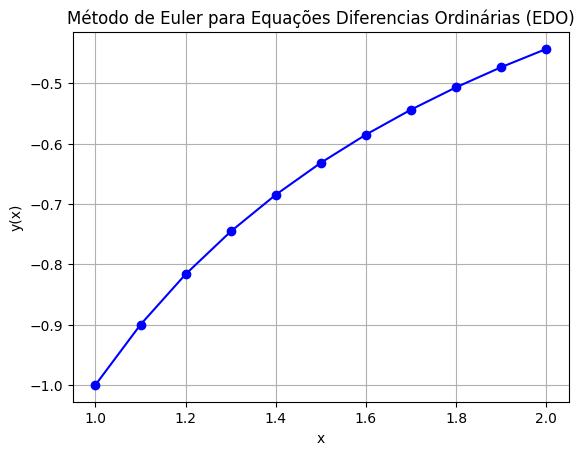

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 1/x**2 - y/x - y**2

def metodo_euler(f, x0, y0, h, N):
    x_values = [x0 + i * h for i in range(N+1)]
    y_values = [y0]

    for i in range(N):
        y0 = y0 + h * f(x_values[i], y0)
        y_values.append(y0)

    return x_values, y_values

x0 = 1
y0 = -1

h = 0.1
N = 10

x_values, y_values = metodo_euler(f, x0, y0, h, N)

plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.title('Método de Euler para Equações Diferencias Ordinárias (EDO)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()


### QUESTÃO 5
Dados o PVI abaixo e a sua solução exata, use dois métodos diferentes para estimar $u(t)$ com o passo sugerido, plote e comente os resultados.

$$ \begin{cases}
u'= t^2(5-u)\\
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$
Solução exata: $u(t)=5-5e^{-t^3/3}$. Use passo $h=0,25$ e também $h=0,1$.

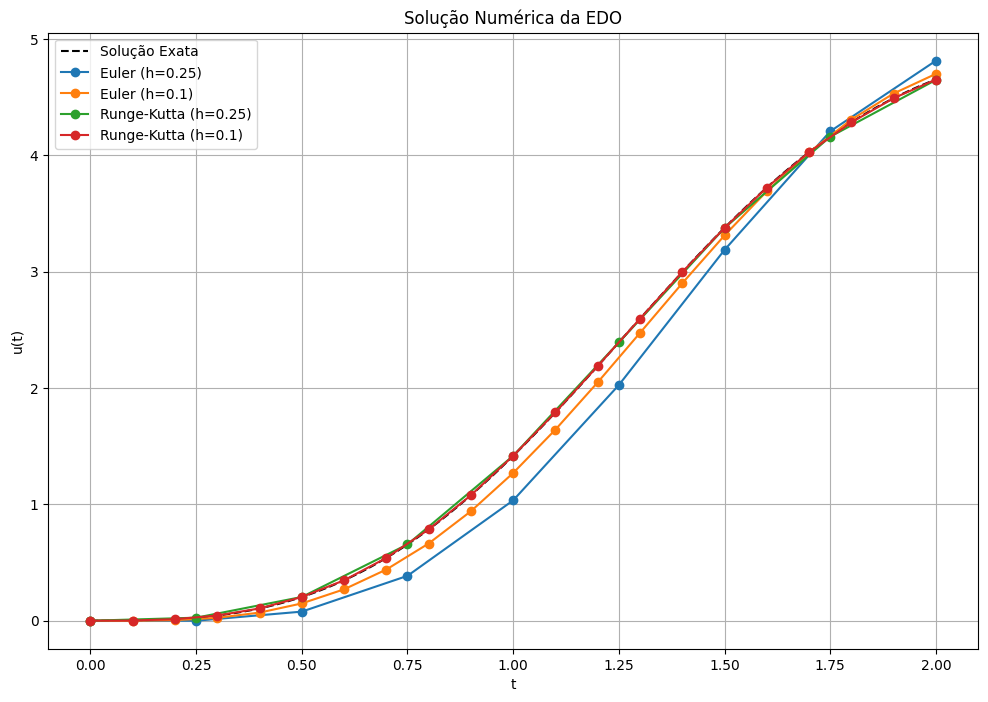

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, u):
    return t**2 * (5 - u)

def exact_solution(t):
    return 5 - 5 * np.exp(-t**3 / 3)

def metodo_runge_kutta(f, h, t_max):
    t_values = np.arange(0, t_max + h, h)
    u_values = [0]

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        u = u_values[i - 1]

        k1 = h * f(t, u)
        k2 = h * f(t + h / 2, u + k1 / 2)
        k3 = h * f(t + h / 2, u + k2 / 2)
        k4 = h * f(t + h, u + k3)

        u_new = u + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        u_values.append(u_new)

    return t_values, u_values

h1 = 0.25
h2 = 0.1
t_max = 2

t_euler_1, u_euler_1 = metodo_euler(f, 0, 0, h1, int(t_max/h1))

t_euler_2, u_euler_2 = metodo_euler(f, 0, 0, h2, int(t_max/h2))

t_rk_1, u_rk_1 = metodo_runge_kutta(f, h1, t_max)

t_rk_2, u_rk_2 = metodo_runge_kutta(f, h2, t_max)

t_exact = np.linspace(0, t_max, 100)
u_exact = exact_solution(t_exact)

plt.figure(figsize=(12, 8))
plt.plot(t_exact, u_exact, label='Solução Exata', linestyle='--', color='black')
plt.plot(t_euler_1, u_euler_1, label='Euler (h=0.25)', marker='o')
plt.plot(t_euler_2, u_euler_2, label='Euler (h=0.1)', marker='o')
plt.plot(t_rk_1, u_rk_1, label='Runge-Kutta (h=0.25)', marker='o')
plt.plot(t_rk_2, u_rk_2, label='Runge-Kutta (h=0.1)', marker='o')

plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Solução Numérica da EDO')
plt.legend()
plt.grid(True)
plt.show()
